# Question - 1

The loss fucntion for L2 regularised logictic regression is, 

$$ f(\mathbf{\omega}') = \frac{1}{n} \sum_{i=1}^n \log(1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))) + \lambda \| \mathbf{\omega}\|_2^2  $$

We need to compute the gradient and hessian of the loss function. 

- The Gradient

$$\nabla f(\mathbf{\omega}') = \frac{1}{n} \sum_{i=1}^n \frac{\exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))}{1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))} (-y_i x_i') + 2 \lambda \mathbf{\omega_i'}$$

$$\nabla f(\mathbf{\omega}') = \frac{1}{n} \sum_{i=1}^n \frac{-y_i x_i'}{1 + \exp(y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))}  + 2 \lambda \mathbf{\omega_i'}$$


where, $x_i' = \begin{pmatrix}
1 \\
x_i
\end{pmatrix}$ and $\omega_i' = \begin{pmatrix}
0 \\
\omega_i
\end{pmatrix}$

- The Hessian

$$\nabla^2 f(\mathbf{\omega}') = \frac{1}{n} \sum_{i=1}^n \frac{\exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))}{(1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i)))^2} (y_i)^2 \begin{pmatrix}
    1 & x_1 & \dots  & x_n \\
    x_1 & x_1^2 &  \dots & x_1 x_n \\
    \dots & \dots & \dots & \dots \\
    x_n & x_n x_1 &  \dots & x_n^2 \\
  \end{pmatrix} + 2 \lambda \begin{pmatrix} 0 & 0 \\ 0 & I \end{pmatrix}$$
  
$$\nabla^2 f(\mathbf{\omega}') = \frac{1}{n} \sum_{i=1}^n \frac{\exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))}{(1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i)))^2} (y_i)^2 x_i'^T x_i' + 2 \lambda \begin{pmatrix} 0 & 0 \\ 0 & I \end{pmatrix}$$

Where, $I = n \times n$ Identity matrix

#### Showing that logistic loss function with L2 regularization is convex

The loss fucntion for L2 regularised logictic regression is, 

$$ f(\mathbf{\omega}') = \frac{1}{n} \sum_{i=1}^n \log(1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))) + \lambda \| \mathbf{\omega}\|_2^2  $$


- $\mathbf{\omega}_o + \mathbf{\omega}^T x_i$ this is affine function. So, affile functions are convex. 
- $\exp(.)$ function is convex. And we also know that composition of two convex functions are convex. Hence, $1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))$ is convex.
- We also know that, $\log(sum(\exp(.)))$ is convex. Because, gradient of $\log(sum(\exp(.)))$ is $softmax(.)$ and Hessian of $\log(sum(\exp(.)))$ is positive semidefinite. Hence.  $\log(1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i)))$ is convex. 
- Sum of multiple convex functions are convex. Hence, $ \frac{1}{n} \sum_{i=1}^n \log(1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i)))$ this is convex. 
- 2-Norm is also aconvex function and square of any function is a convex function. Hence, square of 2 norm is also convex. $\lambda \| \mathbf{\omega}\|_2^2$. 
- Again we can say that, sum of two convex functions are convex. Hence, Logistic Regression with l-2 regularization is also convex. 


Alternatively, we can say that the hessian of $f(\omega') >= 0$ or in other words positive semidefinite. 
- $x_i'^T x_i'$ is always positive semi definite. 
- $ \frac{\exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i))}{(1 + \exp(-y_i(\mathbf{\omega}_o + \mathbf{\omega}^T x_i)))^2} (y_i)^2 >= 0$
- $\lambda >= 0$ for the regularization term. Hence, $2 \lambda \begin{pmatrix} 0 & 0 \\ 0 & I \end{pmatrix}$ is also positive. 
- By second order characterization of convexity, we can say that Logistic regression is convex optimization probelm. 

# Question - 2

In [1]:
from utils import mnist_reader
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from utils.helper import get_sprite_image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import top_k_accuracy_score, confusion_matrix

In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

#### Showing first 20 train images from the dataset

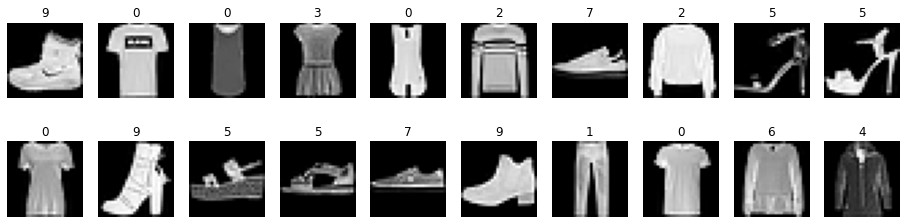

In [3]:
plt.figure(figsize=(16, 4))

for i in range(20):
    image = X_train[i]
    label = y_train[i]
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.reshape(28,28), cmap = "gray")
    plt.axis('off')
    plt.title(label)

#### Pre-processing the data  

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

#### Showing image for each class 

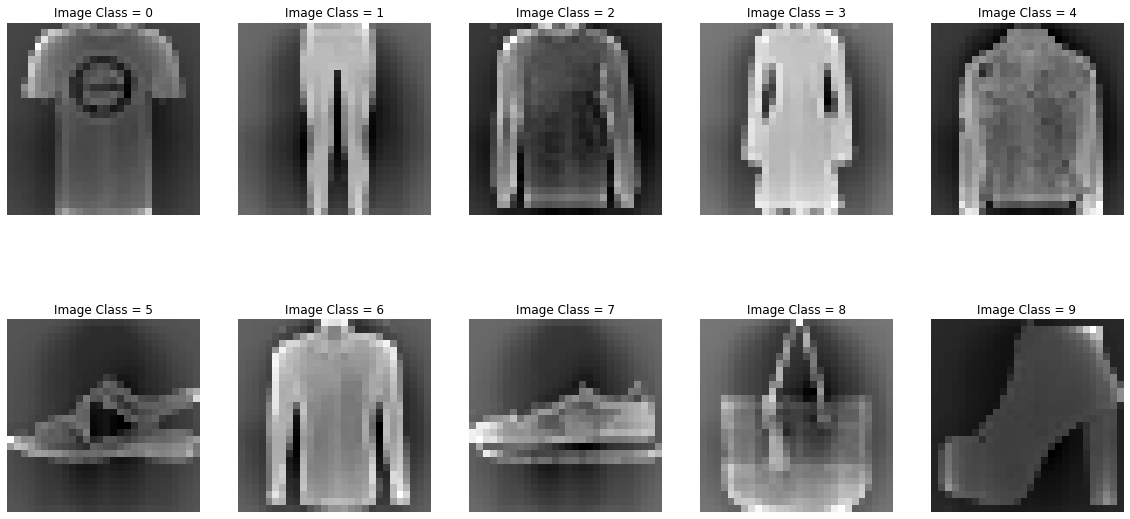

In [5]:
fig, axs = plt.subplots(2,5, figsize = (20,10))

idx = list(range(10))   
stack = []
for i in range(50):
    image = X_train[i]
    label = y_train[i]
    if label in idx:
        if label not in stack:
            if label>= 0 and label < 5 : 
                axs[0,label].imshow(image.reshape(28,28), cmap = "gray")
                axs[0,label].set_title("Image Class = {}".format(label))
                axs[0,label].axis("off")
            else:
                axs[1,label-5].imshow(image.reshape(28,28), cmap = "gray")
                axs[1,label-5].set_title("Image Class = {}".format(label))
                axs[1,label-5].axis("off")
   

In [6]:
clf = LogisticRegression(penalty='l2', tol=0.001, fit_intercept=True, multi_class = 'multinomial', 
                         solver='saga', max_iter=500).fit(X_train, y_train)

## Test Accuracy 

In [7]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

In [8]:
k_1 = top_k_accuracy_score(y_test, y_score, k=1)
k_5 = top_k_accuracy_score(y_test, y_score, k=5) 

In [9]:
print(k_1)

0.8466


In [10]:
print(k_5)

0.9961


In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[816,   1,  12,  51,   6,   0, 101,   1,  11,   1],
       [  3, 957,   3,  26,   5,   0,   4,   0,   2,   0],
       [ 23,   5, 741,  11, 125,   2,  81,   2,  10,   0],
       [ 25,  12,  15, 877,  29,   1,  36,   0,   5,   0],
       [  0,   1, 105,  35, 771,   2,  79,   0,   7,   0],
       [  0,   1,   0,   0,   0, 914,   0,  55,   6,  24],
       [142,   3, 119,  36, 108,   1, 569,   0,  21,   1],
       [  0,   0,   0,   0,   0,  31,   0, 941,   0,  28],
       [  4,   1,   8,  10,   2,   6,  24,   6, 937,   2],
       [  0,   0,   0,   0,   0,  13,   1,  43,   0, 943]], dtype=int64)

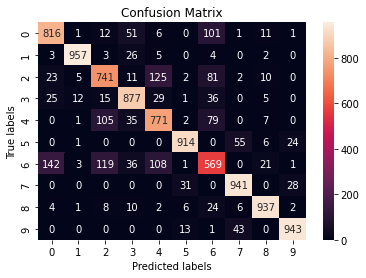

In [33]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

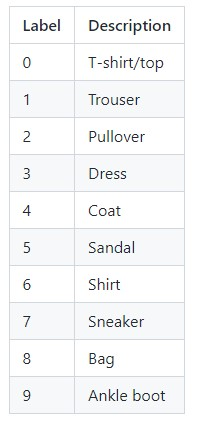

### Conclusion from Confusion Matrix

- T-shirt/top, Pullover, Coat and Shirt these classes are confusing. 
    - 101 numbers of T-shirts (label = 0) are classified as shirt (label = 6). 
    - Also, 142 Shirts (label = 6) are classified as T-shirts (label = 0). 
    - Shirts are also misclassified to Pullover (label = 2) and Coat (label = 4).
    - For Shirt category true positive is only 569 out of 1000. So, Shirt is majorly misclassified. 
- Ankle Boot, Bag, Sneaker, Trouser and Sandals are very well classified. 
    - There is a small overlapping in between the shoes categories. But the results are better than T-shirt/top, Pullover, Coat and Shirt.
- For Dress category, sometimes it confuses with Coat, Shirt and T-shirt.

#### Trouser is best classified among all the categories. True positive value of Trouser (label = 1) is 95.7 %
#### Shirt is worst classied among all the categories. True positive value of Shirt (label = 6) is 56.9 % 


### Train Accuracy 

In [12]:
y_train_pred = clf.predict(X_train)
y_train_score = clf.predict_proba(X_train)

In [13]:
k_1_train = top_k_accuracy_score(y_train, y_train_score, k=1)
k_5_train = top_k_accuracy_score(y_train, y_train_score, k=5) 

In [14]:
print(k_1_train)

0.87565


In [15]:
print(k_5_train)

0.9969666666666667


In [34]:
cm = confusion_matrix(y_train, y_train_pred)

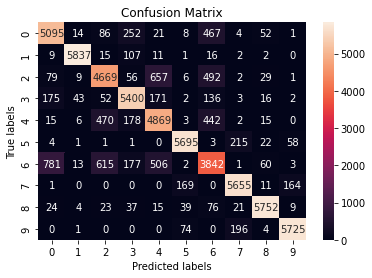

In [35]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

#### Example of Misclassified Sample

In [19]:
misclassified = np.where(y_train != y_train_pred)

Text(0.5, 1.0, 'True Label = 4, Predicted Label = 2')

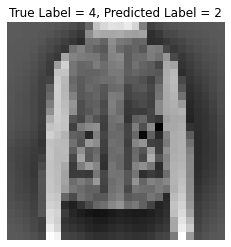

In [29]:
idx = misclassified[0][20]
image = X_train[idx]
true_label = y_train[idx]
predicted_label = y_train_pred[idx]
plt.imshow(image.reshape(28,28), cmap = "gray")
plt.axis('off')
plt.title("True Label = {}, Predicted Label = {}".format(true_label, predicted_label))

The true label is T-shirt/top (label = 0) but the ML model got confused and predicted it as Dress (label = 3). 

# Question 3

So the loss function given is, 


$$f(W,b) = - \frac{1}{n} \sum_{i = 1}^n [y_i^T (\mathbf{W} x_i + \mathbf{b}) - \log(\mathbb{1}^T \exp(\mathbf{W} x_i + \mathbf{b}))] + \lambda \|\mathbf{W}\|_F^2 $$

Gradient of log(sum(exp(.))) is softmax. 

$$\nabla_b(\mathbf{W},b) = - \frac{1}{n} \sum_{i = 1}^n [(y_i)_j  [softmax(\mathbf{W} x_i + \mathbf{b})]_j]_{j = 1 : K}  $$

$$ \nabla_\mathbf{W}(\mathbf{W},b) = - \frac{1}{n} \sum_{i = 1}^n \mathbf{y}_i \odot \begin{pmatrix}
    x_1 & x_2 & \dots  & x_d \\
    x_1 & x_2 &  \dots & x_d \\
    \dots & \dots & \dots & \dots \\
    x_1 & x_2 &  \dots & x_d \\
  \end{pmatrix} - softmax(\mathbf{W} x_i + \mathbf{b}) \odot \begin{pmatrix}
    x_1 & x_2 & \dots  & x_d \\
    x_1 & x_2 &  \dots & x_d \\
    \dots & \dots & \dots & \dots \\
    x_1 & x_2 &  \dots & x_d \\
  \end{pmatrix} + 2 \lambda \begin{pmatrix}
    w_{1,1} & w_{1,2} & \dots  & w_{1,d} \\
    w_{2,1} & w_{2,2} &  \dots & w_{2,d} \\
    \dots & \dots & \dots & \dots \\
    w_{n,1} & w_{n,2} &  \dots & w_{n,d} \\
  \end{pmatrix} $$
  
  
In short, we can write this as, 

$$\nabla_\mathbf{W}(\mathbf{W},b) = - \frac{1}{n} \sum_{i = 1}^n y_i X^T - softmax(\mathbf{W} x_i + \mathbf{b}) X^T + 2 \lambda \mathbf{W}$$
